In [1]:
import sys
sys.path.append("/home/hwpc03/workspace/ma-yang/reproduction_likelihood")

In [2]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt
import pbdlib as pbd

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
def separate_xdx(mydata_xdx):
    mydata_x = []
    mydata_dx = []
    if np.array(mydata_xdx).ndim == 3:
        for i in range(len(mydata_xdx)):
            temp_x = []
            temp_dx = []
            for j in range(len(mydata_xdx[i])):
                temp_x.append([mydata_xdx[i][j][0], mydata_xdx[i][j][1]])
                temp_dx.append([mydata_xdx[i][j][2], mydata_xdx[i][j][3]])
            temp_x1 = np.array(temp_x)
            temp_dx1 = np.array(temp_dx)
            mydata_x.append(temp_x1)
            mydata_dx.append(temp_dx1)
        return mydata_x, mydata_dx
    elif np.array(mydata_xdx).ndim == 2:
        temp_x = []
        temp_dx = []
        for i in range(len(mydata_xdx)):
            temp_x.append([mydata_xdx[i][0], mydata_xdx[i][1]])
            temp_dx.append([mydata_xdx[i][2], mydata_xdx[i][3]])
        return temp_x, temp_dx
    else:
        print("Error! The dimension of data is neither 2 or 3")

In [4]:
import random
from scipy import interpolate

def DataProcessing(data):
        data = np.array(data)
        nsamples, nx, ny = data.shape
        if nx > 200:                                                # delete randomly datapoints
            index = random.sample(range(1,nx), nx-200)
            demo_data = np.delete(data, index, axis=1)
            demo_data_dim2 = demo_data.reshape((nsamples,-1))
            return demo_data, demo_data_dim2
        elif nx < 200:                                               # Interpolation
            demo_data = []
            for k in range(len(data)):
                values = np.reshape(data[k],-1)
                points = np.array([[i,j] for i in range(0, nx) for j in range(0, ny)])
                grid_x, grid_y = np.mgrid[0:nx-1:200j, 0:ny-1:4j]
                data_new = interpolate.griddata(points, values, (grid_x, grid_y), method='nearest')
                demo_data.append(data_new)
            demo_data = np.array(demo_data)
            demo_data_dim2 = demo_data.reshape((nsamples,-1))
            return demo_data, demo_data_dim2
        else:
            demo_data_dim2 = data.reshape((nsamples,-1))
            return data, demo_data_dim2

In [5]:
def create_hsmm_data(demo_pred):
    letter = demo_pred[0]
    files = ['demo%s'%letter, 'demo%s1'%letter, 'demo%s2'%letter, 'demo%s3'%letter, 'demo%s4'%letter, 'demo%s5'%letter, 'demo%s6'%letter, 'demo%s7'%letter, 'demo%s8'%letter, 'demo%s9'%letter]
    # files = ['demo%s'%letter, 'demo%s1'%letter, 'demo%s2'%letter, 'demo%s3'%letter, 'demo%s4'%letter]
    files.pop(0)

    train_data = np.load("./mydataset/demo%s.npy"%letter, allow_pickle=True)
    train_data = train_data.tolist()
    train_data_xdx = [np.hstack([_x, _dx]) for _x ,_dx in zip(train_data['x'], train_data['dx'])]
    demo_data, _ = DataProcessing(train_data_xdx)
    for i in files:
        mydata1 = np.load("./mydataset/%s.npy"%i, allow_pickle=True)
        mydata1 = mydata1.tolist()
        mydata1_xdx = [np.hstack([_x, _dx]) for _x ,_dx in zip(mydata1['x'], mydata1['dx'])]
        demo_data1, _ = DataProcessing(mydata1_xdx)
        demo_data = np.vstack((demo_data,demo_data1))
    return demo_data

In [14]:
data_xdx = create_hsmm_data('Q')
data_x, data_dx = separate_xdx(data_xdx)

EM converges


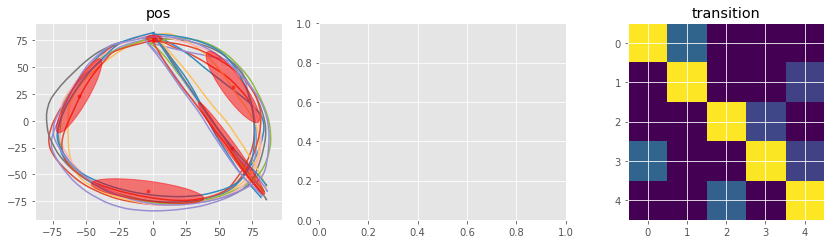

In [15]:
#model_A = pbd.HSMM(nb_states=5, nb_dim=4)
model_A = pbd.HSMM(nb_states=5, nb_dim=4)

#model_A.init_hmm_kbins(data_xdx) # initializing model
model_A.init_hmm_kbins(data_x) # initializing model

# EM to train model
#model_A.em(data_xdx, reg=1e-6)
model_A.em(data_x, reg=1e-6) 


# plotting
fig, ax = plt.subplots(ncols=3)
fig.set_size_inches(12,3.5)

# position plotting
ax[0].set_title('pos')
for p in data_x:
    ax[0].plot(p[:, 0], p[:, 1])
    
pbd.plot_gmm(model_A.mu, model_A.sigma, ax=ax[0], dim=[0, 1]); 

# velocity plotting
#ax[1].set_title('vel')
#for p in data_dx:
#    ax[1].plot(p[:, 0], p[:, 1])
    
#pbd.plot_gmm(model_A.mu, model_A.sigma, ax=ax[1], dim=[2, 3]); 


# plotting transition matrix
ax[2].set_title('transition')
ax[2].imshow(np.log(model_A.Trans+1e-10), interpolation='nearest', vmin=-5, cmap='viridis');
plt.tight_layout()

In [6]:
data = np.load('./mydataset/demoW9.npy', allow_pickle=True)
data = data.tolist()
data_xdx = [np.hstack([_x, _dx]) for _x ,_dx in zip(data['x'], data['dx'])]
data_x, data_dx = separate_xdx(data_xdx)

EM converges


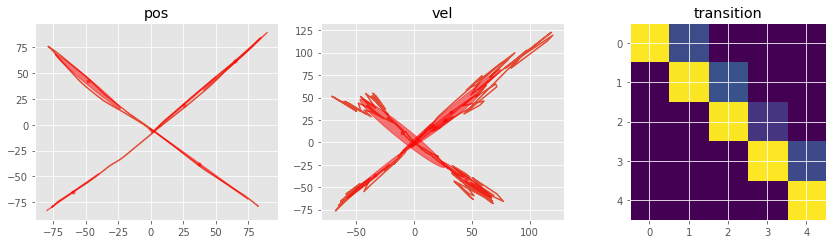

In [7]:
model = pbd.HSMM(nb_states=5, nb_dim=4)

model.init_hmm_kbins(data_xdx) # initializing model

# EM to train model
model.em(data_xdx, reg=1e-6) 


# plotting
fig, ax = plt.subplots(ncols=3)
fig.set_size_inches(12,3.5)

# position plotting
ax[0].set_title('pos')
for p in data_x:
    ax[0].plot(p[:, 0], p[:, 1])
    
pbd.plot_gmm(model.mu, model.sigma, ax=ax[0], dim=[0, 1]); 

# velocity plotting
ax[1].set_title('vel')
for p in data_dx:
    ax[1].plot(p[:, 0], p[:, 1])
    
pbd.plot_gmm(model.mu, model.sigma, ax=ax[1], dim=[2, 3]); 


# plotting transition matrix
ax[2].set_title('transition')
ax[2].imshow(np.log(model.Trans+1e-10), interpolation='nearest', vmin=-5, cmap='viridis');
plt.tight_layout()